<a id=section2></a>
## 2. Importing Packages

In [ ]:
# To use some functions from tensorflow_docs
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-sujqd4ub
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-sujqd4ub
     |████████████████████████████████| 1.0MB 6.7MB/s 
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0b5de8b6909eadaaa5c4854d80ed8e75afd3083a4_-cp36-none-any.whl size=146329 sha256=adc48f64a18a9562914abbac5cdc92bdaae2c49577a5ffbdca5902b619efa2a7
  Stored in directory: /tmp/pip-ephem-wheel-cache-caffnhyi/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs
  Found existing installation: protobuf 3.12.4
    Uninstalling protobuf-3.12.4:
      Successfully uninstalled protobuf-3.12.4


In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Import tensorflow 2.x
# This code block will only work in Google Colab.
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

2.3.0


<a id=section3></a>
## 3. Loading Data

In [ ]:
tumor_train = pd.read_csv('tumor_train.csv')
tumor_train.head()

,Id,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
0,2484,8966.25,2290.10,0.25541,86.3614,1.210154e+06,123.099,3801.09,37,35.3347,2.040
1,7971,23451.80,5523.74,0.23553,318.7650,3.230021e+06,400.988,6233.68,154,19.8012,0.950
2,5808,9943.24,3395.25,0.34146,119.6230,1.314472e+06,182.907,4458.68,182,29.5710,1.383
3,3944,9217.15,1679.83,0.18225,89.1005,1.315326e+06,126.542,4173.45,43,32.0433,0.745
4,2304,12920.00,4785.19,0.37037,170.0430,1.773571e+06,203.413,4901.15,161,28.0393,6.830


In [ ]:
tumor_test = pd.read_csv('tumor_test.csv')
tumor_test.head()

,Id,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio
0,1962,9442.86,2608.70,0.27626,76.0109,1.283025e+06,119.600,4284.97,54,33.7830
1,7018,10488.60,2389.16,0.22778,123.7160,1.431194e+06,146.515,3638.58,13,34.7684
2,711,14648.60,4799.59,0.32764,172.1850,2.009699e+06,257.127,4864.58,29,29.0607
3,3443,15068.60,3005.83,0.19947,195.6130,2.079564e+06,246.238,5105.25,178,25.4230
4,7087,10101.70,3469.03,0.34341,96.0650,1.435378e+06,135.567,4604.39,105,30.7345


<a id=section301></a>
### 3.1 Description of the Dataset

- The dataset contains all the necessary **information** about the area where the tumour is situated.


-  The dataset also contain the column **tumor_size** which tells us the size of the melanoma tumor. 



| Column Name        | Description                                               |
| -------------      |:-------------                                            :| 
| Id         |Unique Id of the sample.                                | 
|mass_npea            | The mass of the area understudy for melanoma tumor.                        |  
| size_npear    | The size of the area understudy for melanoma tumor.                                           | 
|malign_ratio         | Ration of normal to malign surface understudy.                                        |   
| damage_size        |  Unrecoverable area of skin damaged by the tumor.                                      |
|exposed_area            |Total area exposed to the tumor.                                            |
|std_dev_malign     |  Standard deviation of malign skin measurements.
|err_malign     |  Error in malign skin measurements
|malign_penalty      |  penalty applied due to measurement error in the lab.
|damage_ratio      |  Tthe ratio of damage to total spread on the skin.
|tumor_size      |  Size of melanoma_tumor.

In [ ]:
tumor_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7316 entries, 0 to 7315
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              7316 non-null   int64  
 1   mass_npea       7316 non-null   float64
 2   size_npear      7316 non-null   float64
 3   malign_ratio    7316 non-null   float64
 4   damage_size     7316 non-null   float64
 5   exposed_area    7316 non-null   float64
 6   std_dev_malign  7316 non-null   float64
 7   err_malign      7316 non-null   float64
 8   malign_penalty  7316 non-null   int64  
 9   damage_ratio    7316 non-null   float64
 10  tumor_size      7316 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 628.8 KB


In [ ]:
tumor_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1830 entries, 0 to 1829
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              1830 non-null   int64  
 1   mass_npea       1830 non-null   float64
 2   size_npear      1830 non-null   float64
 3   malign_ratio    1830 non-null   float64
 4   damage_size     1830 non-null   float64
 5   exposed_area    1830 non-null   float64
 6   std_dev_malign  1830 non-null   float64
 7   err_malign      1830 non-null   float64
 8   malign_penalty  1830 non-null   int64  
 9   damage_ratio    1830 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 143.1 KB


**Observation**

  - The train set has **7316 samples (rows)** and **11 columns**.

  - The test set has **1830 samples** and **10 columns**.
  
  - There are **11 columns** with a **numeric** datatype 
  
  - There are **0 missing** values in the data.

In [ ]:
tumor_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,7316.0,4.572896e+03,2634.666726,1.00000,2298.750000,4.561500e+03,6.850250e+03,9.145000e+03
mass_npea,7316.0,9.903204e+03,4035.017571,2864.76000,6983.410000,8.894730e+03,1.213738e+04,3.699540e+04
size_npear,7316.0,3.033188e+03,1453.517395,520.33000,1986.167500,2.688000e+03,3.846612e+03,1.353500e+04
malign_ratio,7316.0,3.030910e-01,0.062637,0.12161,0.258623,3.006600e-01,3.431325e-01,5.253000e-01
damage_size,7316.0,1.039102e+02,55.303260,10.31010,64.011200,8.860810e+01,1.343580e+02,3.443460e+02
exposed_area,7316.0,1.372354e+06,561087.107307,387853.40250,959820.168650,1.238623e+06,1.696990e+06,4.978616e+06
std_dev_malign,7316.0,1.464097e+02,70.223909,31.97040,95.617575,1.266190e+02,1.825915e+02,5.288900e+02
err_malign,7316.0,3.979876e+03,1472.446085,1089.19000,3175.735000,3.849515e+03,4.671913e+03,5.303130e+04
malign_penalty,7316.0,6.996473e+01,55.756789,0.00000,31.000000,5.400000e+01,9.100000e+01,3.400000e+02
damage_ratio,7316.0,3.444139e+01,5.976883,15.22800,30.211175,3.523625e+01,3.882603e+01,4.654640e+01


**Observation**
- We can see that most of the columns have a **very high max** value which suggest that they have **outliers**.

- We will further investigate it in our analysis below.


<a id=section302></a>
### 3.2 Pandas Profiling before Data Preprocessing

- Here, we will perform **Pandas Profiling before preprocessing** our dataset, so we will name the **output file** as __tumor_train_before_preprocessing.html__.


- The file will be stored in the directory of your notebook. Open it using the jupyter notebook file explorer and take a look at it and see what insights you can develop from it. 


- Or you can **output the profiling report** in the **current jupyter notebook** as well as shown in the code below. 

<a id=section4></a>
# 4. Data Exploration

**Observation**
- We can see that the column `malign_ratio` is positively correlated with `tumor_size`.

- The column `damage_size` is negatively correlated with `tumor_size`

**Observation**
- The columns `mass_npea` and `exposed_area` has correlation equal to 1.

- The columns `mass_npea` and `exposed_area` is negatively correlated to `damage_ratio`.

<a id=section402></a>
### 4.2 Data processing

In [ ]:
#Separating Input Features and Target Variable.
X_train = tumor_train.drop(columns=['tumor_size'])
y_train= tumor_train['tumor_size']


###  Normalize the Data

- Look again at the `train_stats` block above and note how different the ranges of each feature are.

- It is good practice to normalize features that use different scales and ranges.

- Although the model *might* converge without feature normalization, it makes training more difficult, and it makes the resulting model dependent on the choice of units used in the input.

- **Note**: Although we intentionally generate these statistics from only the training dataset, these statistics will also be used to normalize the test dataset.

- We need to do that to project the test dataset into the same distribution that the model has been trained on.

In [ ]:
train_stats = X_train.describe()

In [ ]:
train_stats
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Id,7316.0,4.572896e+03,2634.666726,1.00000,2298.750000,4.561500e+03,6.850250e+03,9.145000e+03
mass_npea,7316.0,9.903204e+03,4035.017571,2864.76000,6983.410000,8.894730e+03,1.213738e+04,3.699540e+04
size_npear,7316.0,3.033188e+03,1453.517395,520.33000,1986.167500,2.688000e+03,3.846612e+03,1.353500e+04
malign_ratio,7316.0,3.030910e-01,0.062637,0.12161,0.258623,3.006600e-01,3.431325e-01,5.253000e-01
damage_size,7316.0,1.039102e+02,55.303260,10.31010,64.011200,8.860810e+01,1.343580e+02,3.443460e+02
exposed_area,7316.0,1.372354e+06,561087.107307,387853.40250,959820.168650,1.238623e+06,1.696990e+06,4.978616e+06
std_dev_malign,7316.0,1.464097e+02,70.223909,31.97040,95.617575,1.266190e+02,1.825915e+02,5.288900e+02
err_malign,7316.0,3.979876e+03,1472.446085,1089.19000,3175.735000,3.849515e+03,4.671913e+03,5.303130e+04
malign_penalty,7316.0,6.996473e+01,55.756789,0.00000,31.000000,5.400000e+01,9.100000e+01,3.400000e+02
damage_ratio,7316.0,3.444139e+01,5.976883,15.22800,30.211175,3.523625e+01,3.882603e+01,4.654640e+01


In [ ]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

In [ ]:
normed_train_data = norm(X_train)

<a id=section5></a>
## 5. The Model

<a id=section501></a>
### 5.1 Build the Model

- Let's build our model.

- Here, we'll use a `Sequential` model with two densely connected hidden layers, and an output layer that returns a single, continuous value.

- The model building steps are wrapped in a function, `build_model`, since we'll create a second model, later on.

In [ ]:
def build_model():
  model1 = keras.Sequential([layers.Dense(64, activation='relu', input_shape=[len(X_train.keys())]),
                            layers.Dense(64, activation='relu'),
                            layers.Dense(1)])

  # Defining the optimizer with a specific learning rate of 0.001
  optimizer = tf.keras.optimizers.RMSprop(0.001)

  # Compiling the model
  model1.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])
  return model1

In [ ]:
model1 = build_model()



- Using the `.summary` method to print a simple description of the model


In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                704       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,929
Trainable params: 4,929
Non-trainable params: 0
_________________________________________________________________


<a id=section503></a>
### 5.3 Train the Model

- Training the model for 1000 epochs, and recording the training and validation accuracy in the `history` object.

- We are using `tfdocs.modeling.EpochDots()` callback to print a "." every epoch, with reports after each 100 epochs.

  - These print settings are the default values, i. e. printing a "." after each epoch and a report after 100 epochs.

  - We can change these as per our requirements in the callback.

In [ ]:
EPOCHS = 1000

In [ ]:
history = model1.fit(normed_train_data,y_train, epochs=EPOCHS, validation_split=0.2,
                    verbose=0, callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:9.8318,  mae:2.3801,  mse:9.8318,  val_loss:23.2513,  val_mae:3.5700,  val_mse:23.2513,  
....................................................................................................
Epoch: 100, loss:9.4083,  mae:2.3319,  mse:9.4083,  val_loss:24.9489,  val_mae:3.7143,  val_mse:24.9489,  
....................................................................................................
Epoch: 200, loss:9.0907,  mae:2.2929,  mse:9.0907,  val_loss:23.4164,  val_mae:3.4648,  val_mse:23.4164,  
....................................................................................................
Epoch: 300, loss:8.7510,  mae:2.2470,  mse:8.7510,  val_loss:24.2301,  val_mae:3.5357,  val_mse:24.2301,  
....................................................................................................
Epoch: 400, loss:8.7292,  mae:2.2232,  mse:8.7292,  val_loss:23.6987,  val_mae:3.5378,  val_mse:23.6987,  
..............................................................

### Visualizing the model's training progress using the stats stored in the `history` object.

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,7.435163,2.076543,7.435163,25.452280,3.691347,25.452280,995
996,7.717958,2.098328,7.717958,26.752247,3.795399,26.752247,996
997,7.534036,2.074617,7.534036,25.491768,3.744742,25.491768,997
998,7.623556,2.109018,7.623556,25.627125,3.691307,25.627125,998
999,7.458797,2.087331,7.458797,24.504145,3.654620,24.504145,999


- We are using `tfdocs.plots.HistoryPlotter()` to plot our model history.

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

### Plotting the **MAE** plot for train and val set.

- Specifying the name of our **history** object in the `plotter.plot()` method.

- We also need to specify the **metric** we want to plot.

Text(0, 0.5, 'MAE[tumor_size]')

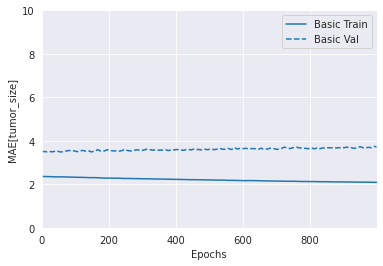

In [ ]:
plotter.plot({'Basic': history}, metric="mae")
plt.ylim([0, 10])
plt.ylabel('MAE[tumor_size]')

### Plotting the **MSE** plot for train and val set.

Text(0, 0.5, 'MSE [tumor_size^2]')

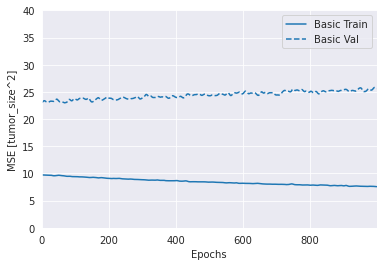

In [ ]:
plotter.plot({'Basic': history}, metric="mse")
plt.ylim([0, 40])
plt.ylabel('MSE [tumor_size^2]')

- This graph shows increase in the validation error as the epoch increases.

- Let's update the `model.fit` call to automatically stop training when the validation score doesn't improve.

- We'll use an *EarlyStopping callback* that tests a training condition for  every epoch.

  - If a set amount of epochs elapses without showing improvement, then automatically stop the training.

In [ ]:
model1 = build_model()

In [ ]:
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
early_history = model1.fit(normed_train_data, y_train, epochs=EPOCHS, validation_split=0.2,
                          verbose=0, callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:40.9189,  mae:4.9474,  mse:40.9189,  val_loss:29.2631,  val_mae:4.4860,  val_mse:29.2631,  
....................................................................................................
Epoch: 100, loss:17.8562,  mae:3.2721,  mse:17.8562,  val_loss:20.4157,  val_mae:3.4976,  val_mse:20.4157,  
...................

In [ ]:
early_hist = pd.DataFrame(early_history.history)
early_hist['epoch'] = early_history.epoch
early_hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
114,17.478559,3.231163,17.478559,20.048920,3.443640,20.048920,114
115,17.359163,3.215344,17.359163,20.305702,3.501830,20.305702,115
116,17.390881,3.226684,17.390881,20.817377,3.496631,20.817377,116
117,17.359638,3.222744,17.359638,20.071758,3.409125,20.071758,117
118,17.266535,3.211669,17.266535,20.273022,3.497321,20.273022,118


- The training stopped before completing the 1000 epochs due to our EarlyStopping callback.

Text(0, 0.5, 'MAE [tumor_size]')

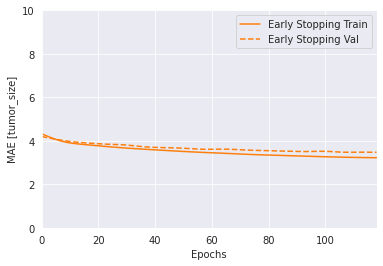

In [ ]:
plotter.plot({'Early Stopping': early_history}, metric="mae")
plt.ylim([0, 10])
plt.ylabel('MAE [tumor_size]')

- The graph shows that on the validation set, the error is around **+/- 3.49 tumor_size**.


<a id=section6></a>
## 6. Model Tuning

- Now we will experiment some methods to **improve** the model **performance** and reduce overfitting.

  - These methods will all be applied during model building.

<a id=section601></a>
### 6.1 Increasing the Number of Hidden Layers and Hidden Units

- Here, we are increasing the number of **hidden layers** from 2 to **4** i. e. adding 2 additional layers.

- Next, we are using **256 hidden units** instead of 64.

In [ ]:
model2 = keras.Sequential([layers.Dense(256, activation='relu', input_shape=[len(X_train.keys())]),
                          layers.Dense(256, activation='relu'),
                          layers.Dense(256, activation='relu'),
                          layers.Dense(256, activation='relu'),
                          layers.Dense(1)])

In [ ]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               2816      
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_9 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 257       
Total params: 200,449
Trainable params: 200,449
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Defining the optimizer with a specific learning rate of 0.001
optimizer = tf.keras.optimizers.RMSprop(0.001)

# Compiling the model
model2.compile(loss='mse', optimizer=optimizer, metrics=['mae'])


- The model will be trained for **100 epochs**.

In [ ]:
history_large = model2.fit(normed_train_data,y_train, epochs=100, validation_split=0.2,
                          verbose=0, callbacks=[early_stop,tfdocs.modeling.EpochDots()])


Epoch: 0, loss:32.0182,  mae:4.4456,  val_loss:25.3072,  val_mae:3.9946,  
........................................

In [ ]:
hist_large = pd.DataFrame(history_large.history)
hist_large['epoch'] = history_large.epoch
hist_large.tail()

,loss,mae,val_loss,val_mae,epoch
35,11.433439,2.429346,20.235449,3.235177,35
36,11.342772,2.417012,19.991377,3.059677,36
37,11.051290,2.366318,20.444344,3.175828,37
38,10.645434,2.326023,20.539961,3.175787,38
39,10.351854,2.310313,21.581596,3.411215,39


Text(0, 0.5, 'MAE [tumor_size]')

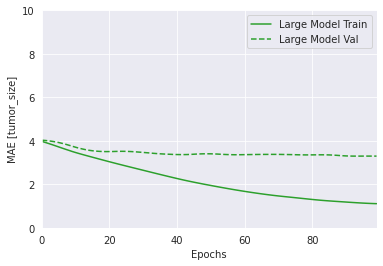

In [ ]:
plotter.plot({'Large Model': history_large}, metric="mae")
plt.ylim([0, 10])
plt.ylabel('MAE [tumor_size]')

- We get a significant decrease in the validation set error.

- We can see that the validation error decrease up to certain epoch and becomes almost constant.



<a id=section602></a>
### 6.2 Combined L2 + Dropout

- We can also combine both L2 regularization and Dropout in a single model.

In [ ]:
from tensorflow.keras import regularizers
model3 = keras.Sequential([layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=[len(X_train.keys())]),
                          layers.Dropout(0.2),
                          layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
                          layers.Dropout(0.2),
                          layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
                          layers.Dropout(0.2),
                          layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
                          layers.Dropout(0.2),
                          layers.Dense(1)])

In [ ]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 256)               2816      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)              

In [ ]:
# Defining the optimizer with a specific learning rate of 0.001
optimizer = tf.keras.optimizers.RMSprop(0.001)

# Compiling the model
model3.compile(loss='mse', optimizer=optimizer, metrics=['mae'])

In [ ]:
history_l2_dropout = model1.fit(normed_train_data,y_train, epochs=100, validation_split=0.2,
                          verbose=0, callbacks=[early_stop,tfdocs.modeling.EpochDots()])


Epoch: 0, loss:16.1572,  mae:3.0951,  mse:16.1572,  val_loss:19.6955,  val_mae:3.3581,  val_mse:19.6955,  
..................

In [ ]:
hist_l2_dropout = pd.DataFrame(history_l2_dropout.history)
hist_l2_dropout['epoch'] = history_l2_dropout.epoch
hist_l2_dropout.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
13,15.889948,3.056051,15.889948,20.036131,3.391482,20.036131,13
14,15.913745,3.067438,15.913745,20.573368,3.553584,20.573368,14
15,15.808784,3.044711,15.808784,21.441921,3.449790,21.441921,15
16,15.858263,3.048914,15.858263,20.599871,3.617135,20.599871,16
17,15.894194,3.055466,15.894194,19.933769,3.417505,19.933769,17


Text(0, 0.5, 'MAE [tumor_size]')

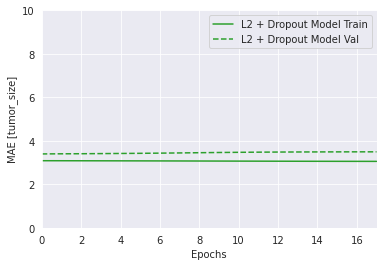

In [ ]:
plotter.plot({'L2 + Dropout Model': history_l2_dropout}, metric="mae")
plt.ylim([0, 10])
plt.ylabel('MAE [tumor_size]')

- The combined L2 + Dropout model has larger validation error than the previous model.


<a id=section603></a>
### 6.3 Batch Normalization

- Batch normalization is a technique for training very deep neural networks.

    - It **normalizes** the **activations** of the previous layer at each batch.

    - It applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1.


In [ ]:
model4 = keras.Sequential([layers.Dense(256, input_shape=[len(X_train.keys())]),
                          layers.BatchNormalization(),
                          layers.ReLU(),
                          layers.Dense(256),
                          layers.BatchNormalization(),
                          layers.ReLU(),
                          layers.Dense(256),
                          layers.BatchNormalization(),
                          layers.ReLU(),
                          layers.Dense(256),
                          layers.BatchNormalization(),
                          layers.ReLU(),
                          layers.Dense(1)])

In [ ]:
model4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 256)               2816      
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
re_lu (ReLU)                 (None, 256)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 256)               65792     
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 256)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 256)              

In [ ]:
# Defining the optimizer with a specific learning rate of 0.001
optimizer = tf.keras.optimizers.RMSprop(0.001)

# Compiling the model
model4.compile(loss='mse', optimizer=optimizer, metrics=['mae'])

In [ ]:
history_batch_norm = model4.fit(normed_train_data, y_train, epochs=100, validation_split=0.2,
                          verbose=0, callbacks=[early_stop,tfdocs.modeling.EpochDots()])


Epoch: 0, loss:31.5135,  mae:4.3440,  val_loss:32.1036,  val_mae:4.2992,  
...........................................................

In [ ]:
hist_batch_norm = pd.DataFrame(history_batch_norm.history)
hist_batch_norm['epoch'] = history_batch_norm.epoch
hist_batch_norm.tail()

,loss,mae,val_loss,val_mae,epoch
54,14.150403,2.794551,19.044619,3.102055,54
55,14.555655,2.824756,18.819120,3.280578,55
56,14.482436,2.818703,19.557215,3.152353,56
57,14.673195,2.836657,19.519911,3.128519,57
58,14.882645,2.867791,18.339912,3.038502,58


Text(0, 0.5, 'MAE [tumor_size]')

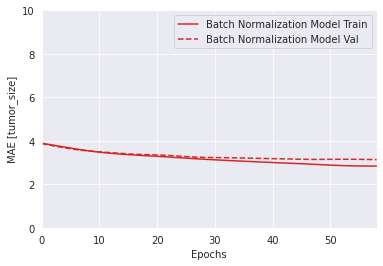

In [ ]:
plotter.plot({'Batch Normalization Model': history_batch_norm}, metric="mae")
plt.ylim([0, 10])
plt.ylabel('MAE [tumor_size]')

- The Batch Normalization model attains the **lowest validation set error**.

- We have significantly **reduced** the **overfitting**.


<a id=section7></a>
#7. Prediction on test set

In [ ]:
test_data = norm(tumor_test)
pred_y=model4.predict(test_data)

In [ ]:
pred_y=pred_y.flatten()

In [ ]:
submission = pd.DataFrame({'Id':tumor_test['Id'],'tumor_size':pred_y})
submission.to_csv('Submission.csv',header=False,index=False)

In [ ]:
submission.head()

,Id,tumor_size
0,1962,11.968806
1,7018,1.061470
2,711,3.035814
3,3443,1.276844
4,7087,15.470489


In [ ]:
y_df = pd.read_csv('tumor_y_test.csv', names=['Id', 'tumor_size'])
y_df.head()

,Id,tumor_size
0,1962,16.262
1,7018,2.131
2,711,3.064
3,3443,1.992
4,7087,19.267
